In [13]:
!pip install sklearn

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [14]:
Ldata = pd.read_csv('hinix_long.csv', encoding='UTF-8', index_col = '날짜')
Ldata.head()

,종가,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수,자본금순이익률,...,주당배당금,배당수익률,배당금총액,당기순이익,매출액증가율,영업이익(조단위),반도체 수출금액지수,금리,WIT 현물유가등락률,원달러환율(원)
날짜,,,,,,,,,,,,,,,,,,,,,
2000,17703,-0.551618,17780,18341,17207,10801089,1.770000e+11,8.670000e+12,490276394,-1.04,...,0,0.0,0.0,-2.570000e+12,0.12,0.0160,40.603333,5.25,58.775000,1259.7
2001,2785,0.048293,2804,2916,2693,143710787,2.780000e+11,1.790000e+12,759312395,-1.33,...,0,0.0,0.0,-5.050000e+12,-0.50,-1.9100,22.136667,4.00,-14.066667,1326.1
2002,955,-0.572295,966,1012,919,407824329,3.010000e+11,2.060000e+12,3420237905,-0.12,...,0,0.0,0.0,-2.030000e+12,-0.11,-0.6712,26.222500,4.25,8.150000,1200.4
2003,4688,0.160526,4700,4867,4556,57406618,1.040000e+11,2.360000e+12,1818367110,-0.14,...,0,0.0,0.0,-2.100000e+12,0.02,0.0432,31.284167,3.75,18.675000,1197.8
2004,10761,0.382972,10781,11088,10489,11116629,1.200000e+11,4.780000e+12,444434620,0.76,...,0,0.0,0.0,1.720000e+12,0.39,2.0300,41.820000,3.25,36.241667,1043.8


## 상관계수 확인

In [16]:
a = pd.Series(Ldata['종가'])
Ldata['종가'].iloc[1:] = np.diff(a)
b = pd.Series(Ldata['금리'])
Ldata['금리'].iloc[1:] = np.diff(b)
#Ldata['종가'] = np.diff(a) #Error occur

c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [17]:
Ldata

,종가,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수,자본금순이익률,...,주당배당금,배당수익률,배당금총액,당기순이익,매출액증가율,영업이익(조단위),반도체 수출금액지수,금리,WIT 현물유가등락률,원달러환율(원)
날짜,,,,,,,,,,,,,,,,,,,,,
2000,17703,-0.551618,17780,18341,17207,10801089,1.770000e+11,8.670000e+12,490276394,-1.04,...,0,0.0,0.000000e+00,-2.570000e+12,0.12,0.0160,40.603333,5.25,58.775000,1259.7
2001,-32621,0.048293,2804,2916,2693,143710787,2.780000e+11,1.790000e+12,759312395,-1.33,...,0,0.0,0.000000e+00,-5.050000e+12,-0.50,-1.9100,22.136667,-1.25,-14.066667,1326.1
2002,13088,-0.572295,966,1012,919,407824329,3.010000e+11,2.060000e+12,3420237905,-0.12,...,0,0.0,0.000000e+00,-2.030000e+12,-0.11,-0.6712,26.222500,0.25,8.150000,1200.4
2003,5563,0.160526,4700,4867,4556,57406618,1.040000e+11,2.360000e+12,1818367110,-0.14,...,0,0.0,0.000000e+00,-2.100000e+12,0.02,0.0432,31.284167,-0.50,18.675000,1197.8
2004,2340,0.382972,10781,11088,10489,11116629,1.200000e+11,4.780000e+12,444434620,0.76,...,0,0.0,0.000000e+00,1.720000e+12,0.39,2.0300,41.820000,-0.50,36.241667,1043.8
2005,1794,0.494659,18581,19040,18259,8570020,1.720000e+11,8.320000e+12,446399965,0.82,...,0,0.0,0.000000e+00,1.850000e+12,-0.11,1.6100,47.195833,0.50,38.975000,1013.0
2006,6933,0.045668,33484,33994,32907,7017262,2.330000e+11,1.520000e+13,453538347,0.89,...,0,0.0,0.000000e+00,2.050000e+12,0.29,2.0700,52.446667,0.75,18.383333,929.6
2007,-16880,-0.110447,31466,31903,30928,5880407,1.850000e+11,1.440000e+13,459184252,0.15,...,0,0.0,0.000000e+00,3.640000e+11,0.11,0.5137,62.615000,0.50,13.408333,938.2
2008,-8128,-0.418548,21238,21692,20732,7919126,1.260000e+11,9.710000e+12,459411385,-2.04,...,0,0.0,0.000000e+00,-4.740000e+12,-0.21,-1.9200,52.578333,-2.00,38.658333,1257.5


In [22]:
data_corr = pd.DataFrame(Ldata).corr(method='pearson')
data_corr.describe()

,종가,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수,자본금순이익률,...,주당배당금,배당수익률,배당금총액,당기순이익,매출액증가율,영업이익(조단위),반도체 수출금액지수,금리,WIT 현물유가등락률,원달러환율(원)
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.169264,0.061571,0.460241,0.460151,0.460328,-0.104894,0.270934,0.470239,-0.019631,0.472736,...,0.480922,0.432360,0.481376,0.487878,0.282160,0.481333,0.486989,0.051185,-0.055630,-0.121210
std,0.264107,0.329266,0.502263,0.502012,0.502426,0.418234,0.258646,0.495200,0.366387,0.427720,...,0.460813,0.444123,0.460428,0.452738,0.351072,0.417059,0.495945,0.284744,0.328581,0.357092
min,-0.217058,-0.447541,-0.422903,-0.423650,-0.422014,-0.475022,-0.163246,-0.356192,-0.395682,-0.459337,...,-0.272842,-0.301437,-0.273523,-0.399671,-0.510128,-0.258621,-0.386136,-0.382624,-0.356192,-0.717061
25%,0.046768,-0.094762,0.073391,0.074277,0.072875,-0.386136,0.053737,0.077422,-0.224074,0.223268,...,0.000079,0.010148,0.004717,0.204646,0.196120,0.121959,0.066262,-0.083095,-0.273523,-0.266237
50%,0.077422,0.121959,0.680530,0.679407,0.681386,-0.246476,0.296515,0.691116,-0.088643,0.680530,...,0.713255,0.731194,0.715635,0.748698,0.264757,0.708216,0.769261,-0.035939,-0.095356,-0.181237
75%,0.223268,0.148626,0.886597,0.886607,0.886796,-0.035939,0.430543,0.913540,-0.052493,0.731194,...,0.886796,0.785207,0.884888,0.769014,0.573634,0.794975,0.915548,0.053737,-0.008837,-0.012134
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 1584x1584 with 0 Axes>

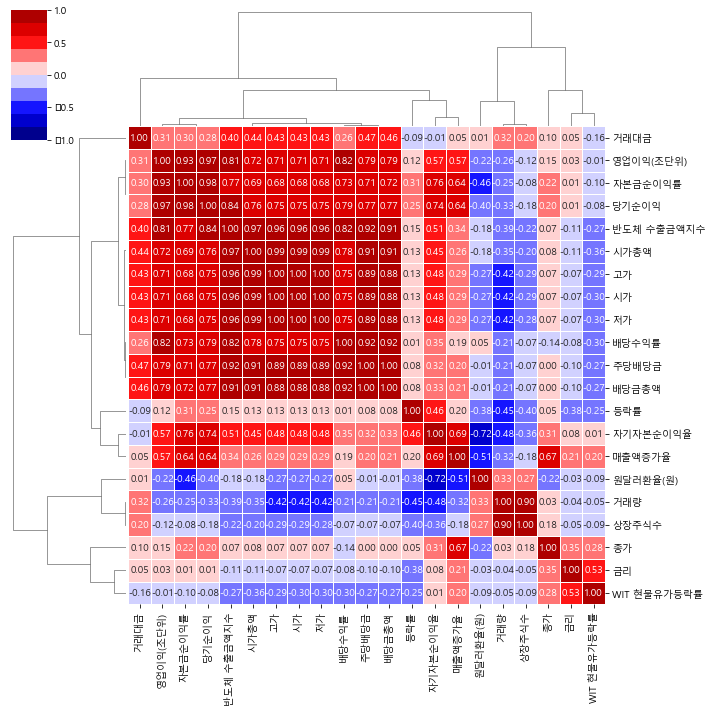

In [24]:
c = sns.color_palette("seismic", 10)
#'RdYlBu_r'
plt.figure(figsize=(22,22))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.clustermap(data_corr, annot=True,vmin = -1, 
               cbar_kws={"shrink": .5},
               vmax = 1, fmt = '.2f', linewidths=.5, cmap = c,metric="correlation")

In [2]:
ser = pd.read_csv('hinix_short3.csv', encoding='euc-kr', index_col = 'date')
ser.head()

,등락.분류,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,...,유가종가,유가오픈,유가고가,유가저가,유가변동률,한국은행기준금리,연준기준금리,한미기준금리차이,날짜,반도체수출금액지수
date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,2,25750.0,1650,6.85,24700.0,26450,24200,9275920,2.360000e+11,8.990000e+12,...,25.55,25.20,25.69,24.71,-0.20,4.75,5.5,0.75,1,34.27
2000-01-05,-2,23100.0,-2650,-10.29,24150.0,24950,22750,7414370,1.780000e+11,8.060000e+12,...,24.91,25.50,25.61,24.87,-2.50,4.75,5.5,0.75,1,34.27
2000-01-06,-2,21900.0,-1200,-5.19,23500.0,23800,21650,6529140,1.480000e+11,7.640000e+12,...,24.78,24.80,25.34,24.51,-0.52,4.75,5.5,0.75,1,34.27
2000-01-07,-1,21700.0,-200,-0.91,21200.0,22400,20800,10492270,2.280000e+11,1.070000e+13,...,24.22,24.65,25.00,24.15,-2.26,4.75,5.5,0.75,1,34.27
2000-01-10,-1,21500.0,-200,-0.92,22000.0,22300,21500,8041690,1.750000e+11,1.060000e+13,...,24.67,24.22,24.75,24.02,1.86,4.75,5.5,0.75,1,34.27


In [7]:
data_corr = pd.DataFrame(ser).corr(method='pearson')
data_corr.describe()

,등락.분류,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,...,유가종가,유가오픈,유가고가,유가저가,유가변동률,한국은행기준금리,연준기준금리,한미기준금리차이,날짜,반도체수출금액지수
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,...,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,0.143948,0.118743,0.139003,0.136456,0.172828,0.174663,0.174381,0.001957,0.117868,0.167881,...,0.125702,0.123260,0.123631,0.125708,0.055613,-0.082142,-0.003208,0.074395,0.053307,0.051222
std,0.298188,0.272003,0.297029,0.293627,0.459836,0.459284,0.459268,0.336356,0.264244,0.457082,...,0.449978,0.450556,0.450534,0.449942,0.212660,0.413203,0.339883,0.360846,0.215464,0.212536
min,-0.055970,-0.030301,-0.046423,-0.030379,-0.723480,-0.722690,-0.724889,-0.302817,-0.220406,-0.768017,...,-0.491486,-0.490709,-0.487616,-0.494805,-0.025186,-0.768017,-0.343248,-0.350035,-0.076714,-0.017351
25%,0.007796,-0.001853,-0.001712,-0.000643,-0.023062,-0.020277,-0.020490,-0.282636,-0.031556,-0.018091,...,-0.092102,-0.092542,-0.091833,-0.093041,-0.009562,-0.121784,-0.231648,-0.220638,-0.017108,-0.004304
50%,0.026916,0.000193,0.009128,0.011067,0.052170,0.055901,0.056481,-0.003538,0.029562,0.056051,...,0.017214,0.009216,0.012663,0.016970,0.007076,-0.052586,-0.040994,0.002677,0.007980,0.004699
75%,0.045979,0.039467,0.038128,0.045871,0.303860,0.307388,0.299939,0.042342,0.260306,0.291179,...,0.111842,0.112295,0.112277,0.112137,0.036446,-0.004303,-0.001506,0.349194,0.034065,0.012896
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 1584x1584 with 0 Axes>

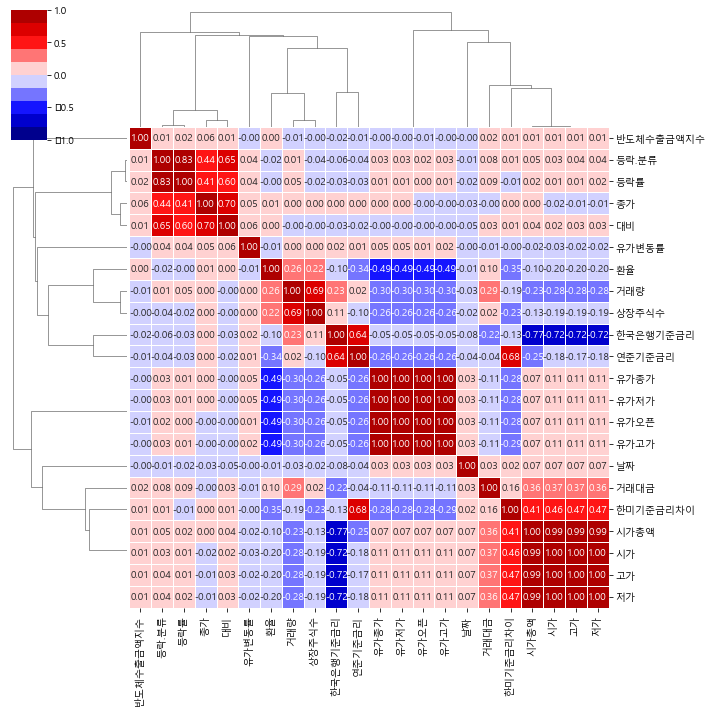

In [8]:
c = sns.color_palette("seismic", 10)
#'RdYlBu_r'
plt.figure(figsize=(22,22))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.clustermap(data_corr, annot=True,vmin = -1, 
               cbar_kws={"shrink": .5},
               vmax = 1, fmt = '.2f', linewidths=.5, cmap = c,metric="correlation")

## 차원축소

In [8]:
Sdata = pd.read_csv('hinix_short.csv',index_col=0,parse_dates=[0], dayfirst=False,infer_datetime_format=True,encoding='cp949')
Sdata.head()

,등락지표,등락 분류,종가,대비,등락률,시가,고가,저가,거래량,거래대금,...,상장주식수,환율,유가종가,유가오픈,유가고가,유가저가,유가변동률,한국은행기준금리,연준기준금리,한미기준금리차이
날짜,,,,,,,,,,,,,,,,,,,,,
2000-01-04,1,2,25750,1650,6.85,24700,26450,24200,9275920,2.360000e+11,...,348934856,1134.5,25.55,25.20,25.69,24.71,-0.20,4.75,5.5,0.75
2000-01-05,-1,-2,23100,-2650,-10.29,24150,24950,22750,7414370,1.780000e+11,...,348934856,1125.8,24.91,25.50,25.61,24.87,-2.50,4.75,5.5,0.75
2000-01-06,-1,-2,21900,-1200,-5.19,23500,23800,21650,6529140,1.480000e+11,...,348934856,1130.1,24.78,24.80,25.34,24.51,-0.52,4.75,5.5,0.75
2000-01-07,-1,-1,21700,-200,-0.91,21200,22400,20800,10492270,2.280000e+11,...,493934856,1139.1,24.22,24.65,25.00,24.15,-2.26,4.75,5.5,0.75
2000-01-10,-1,-1,21500,-200,-0.92,22000,22300,21500,8041690,1.750000e+11,...,493934856,1145.9,24.67,24.22,24.75,24.02,1.86,4.75,5.5,0.75


In [3]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Sdata.drop(['등락지표'], axis=1))

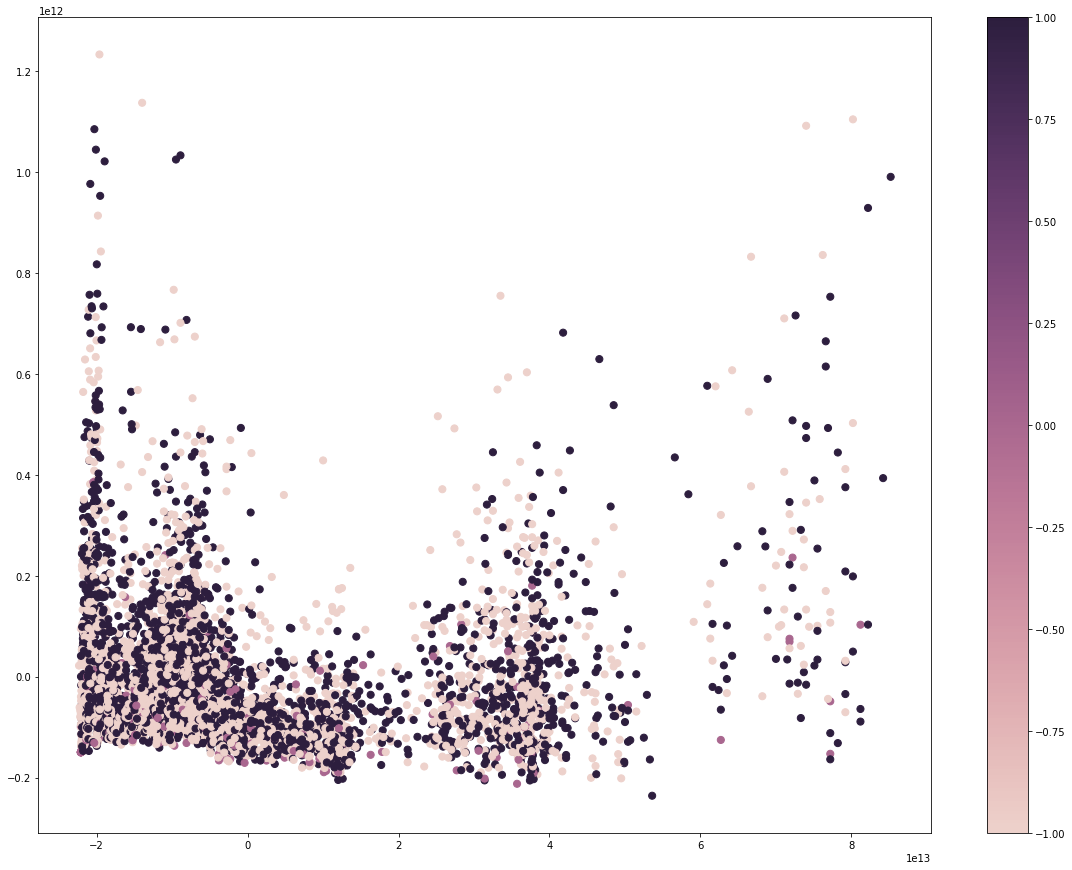

In [4]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots(figsize=(20,15))
points = ax.scatter(pca_result[:,0], pca_result[:,1], c=Sdata['등락지표'], s=50, cmap=cmap)
f.colorbar(points)
plt.show()

In [5]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(Sdata.drop(['등락지표'], axis=1))

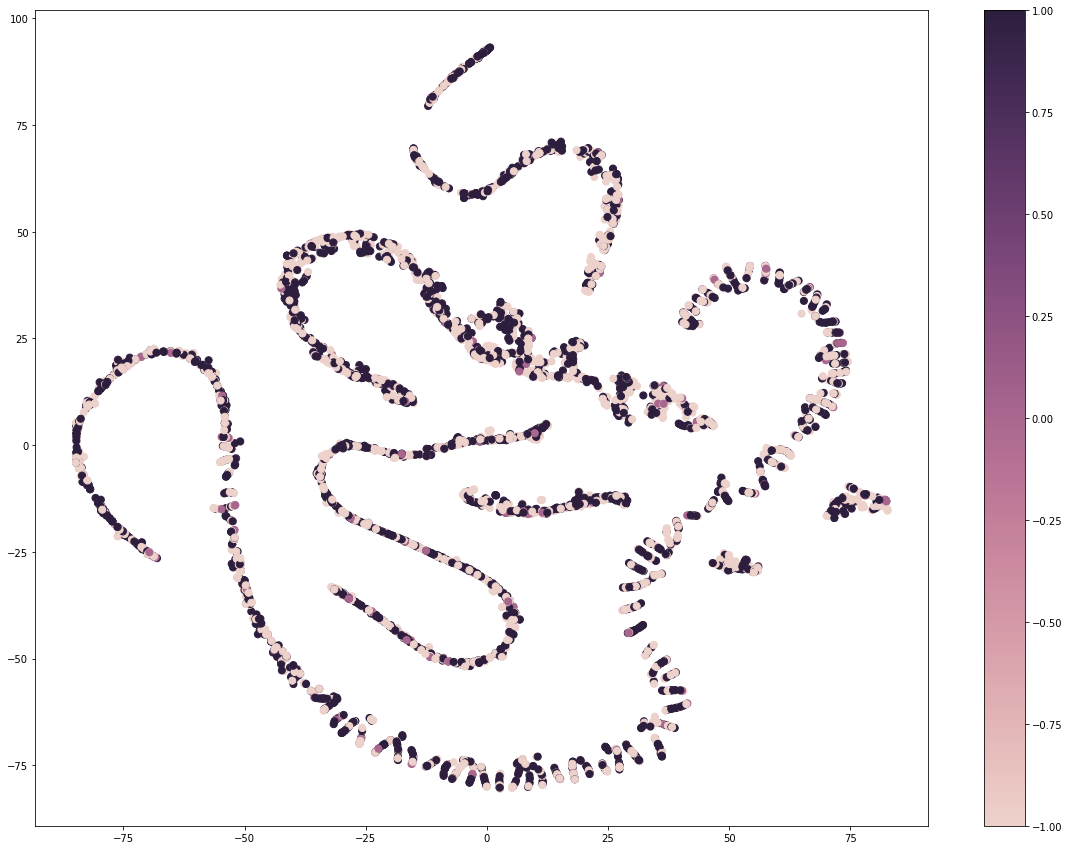

In [6]:
f, ax = plt.subplots(figsize=(20,15))
points = ax.scatter(tsne_result[:,0], tsne_result[:,1], c=Sdata['등락지표'], s=50, cmap=cmap)
f.colorbar(points)
plt.show()

## Min-Max-Scailing

In [7]:
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(Sdata)

output = min_max_scaler.transform(Sdata)
output = pd.DataFrame(output, columns = Sdata.columns, index=list(Sdata.index.values))
output.head()

,등락지표,등락 분류,종가,대비,등락률,시가,고가,저가,거래량,거래대금,...,상장주식수,환율,유가종가,유가오픈,유가고가,유가저가,유가변동률,한국은행기준금리,연준기준금리,한미기준금리차이
2000-01-04,1.0,1.00,0.172649,0.452020,0.728333,0.165772,0.175748,0.169825,0.005061,0.153247,...,0.019921,0.345993,0.345397,0.246247,0.089834,0.354310,0.889823,0.894737,0.84,0.869565
2000-01-05,0.0,0.00,0.154787,0.234848,0.157000,0.162081,0.165781,0.159649,0.004045,0.115584,...,0.019921,0.333035,0.341898,0.248131,0.089235,0.355181,0.883130,0.894737,0.84,0.869565
2000-01-06,0.0,0.00,0.146699,0.308081,0.327000,0.157718,0.158140,0.151930,0.003562,0.096104,...,0.019921,0.339440,0.341187,0.243734,0.087214,0.353220,0.888892,0.894737,0.84,0.869565
2000-01-07,0.0,0.25,0.145351,0.358586,0.469667,0.142282,0.148837,0.145965,0.005725,0.148052,...,0.048976,0.352845,0.338126,0.242792,0.084668,0.351259,0.883829,0.894737,0.84,0.869565
2000-01-10,0.0,0.25,0.144003,0.358586,0.469333,0.147651,0.148173,0.150877,0.004388,0.113636,...,0.048976,0.362973,0.340586,0.240090,0.082797,0.350550,0.895818,0.894737,0.84,0.869565


In [66]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(output.drop(['등락 분류'], axis=1))

c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


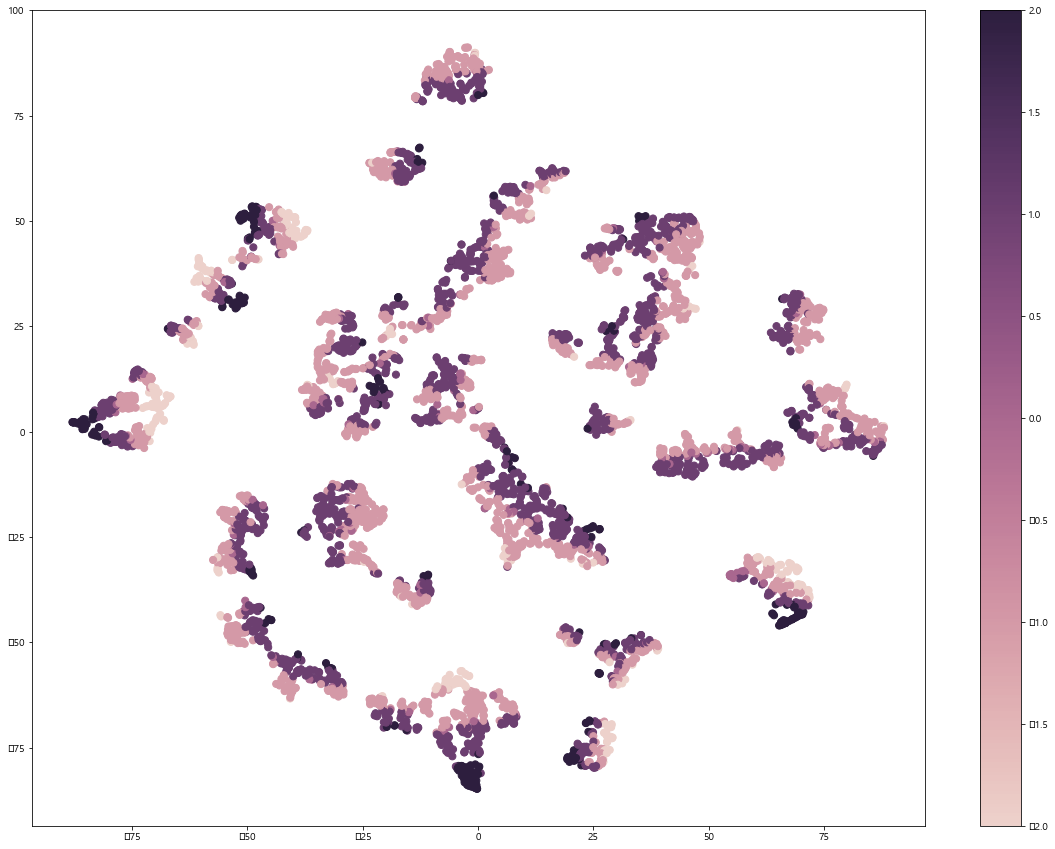

In [67]:
f, ax = plt.subplots(figsize=(20,15))
points = ax.scatter(tsne_result[:,0], tsne_result[:,1], c=Sdata['등락 분류'], s=50, cmap=cmap)
f.colorbar(points)
plt.show()

## Standarization

In [68]:
std_scaler = StandardScaler()
fitted = std_scaler.fit(Sdata)

output = std_scaler.transform(Sdata)
output = pd.DataFrame(output, columns = Sdata.columns, index=list(Sdata.index.values))
output.head()

,등락 분류,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수,환율,유가종가,유가오픈,유가고가,유가저가,유가변동률,한국은행기준금리,연준기준금리,한미기준금리차이
2000-01-04,1.724068,-0.306733,1.492814,1.730774,-0.345704,-0.298616,-0.348275,-0.205211,0.151034,-0.647326,-0.497915,0.057419,-1.363050,-1.377221,-1.382261,-1.371233,-0.035011,1.329896,2.031487,1.350284
2000-01-05,-1.722761,-0.401013,-2.439058,-2.632200,-0.365244,-0.351261,-0.400548,-0.220555,-0.204565,-0.690937,-0.497915,-0.028536,-1.387762,-1.365631,-1.385327,-1.364994,-0.473229,1.329896,2.031487,1.350284
2000-01-06,-1.722761,-0.443706,-1.113194,-1.333999,-0.388337,-0.391622,-0.440205,-0.227852,-0.388495,-0.710632,-0.497915,0.013948,-1.392782,-1.392674,-1.395674,-1.379032,-0.095981,1.329896,2.031487,1.350284
2000-01-07,-0.861054,-0.450821,-0.198805,-0.244528,-0.470050,-0.440757,-0.470848,-0.195184,0.101986,-0.567138,-0.339347,0.102867,-1.414406,-1.398469,-1.408703,-1.393071,-0.427502,1.329896,2.031487,1.350284
2000-01-10,-0.861054,-0.457937,-0.198805,-0.247073,-0.441628,-0.444266,-0.445612,-0.215384,-0.222958,-0.571828,-0.339347,0.170050,-1.397030,-1.415081,-1.418283,-1.398141,0.357480,1.329896,2.031487,1.350284


In [69]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(output.drop(['등락 분류'], axis=1))

c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


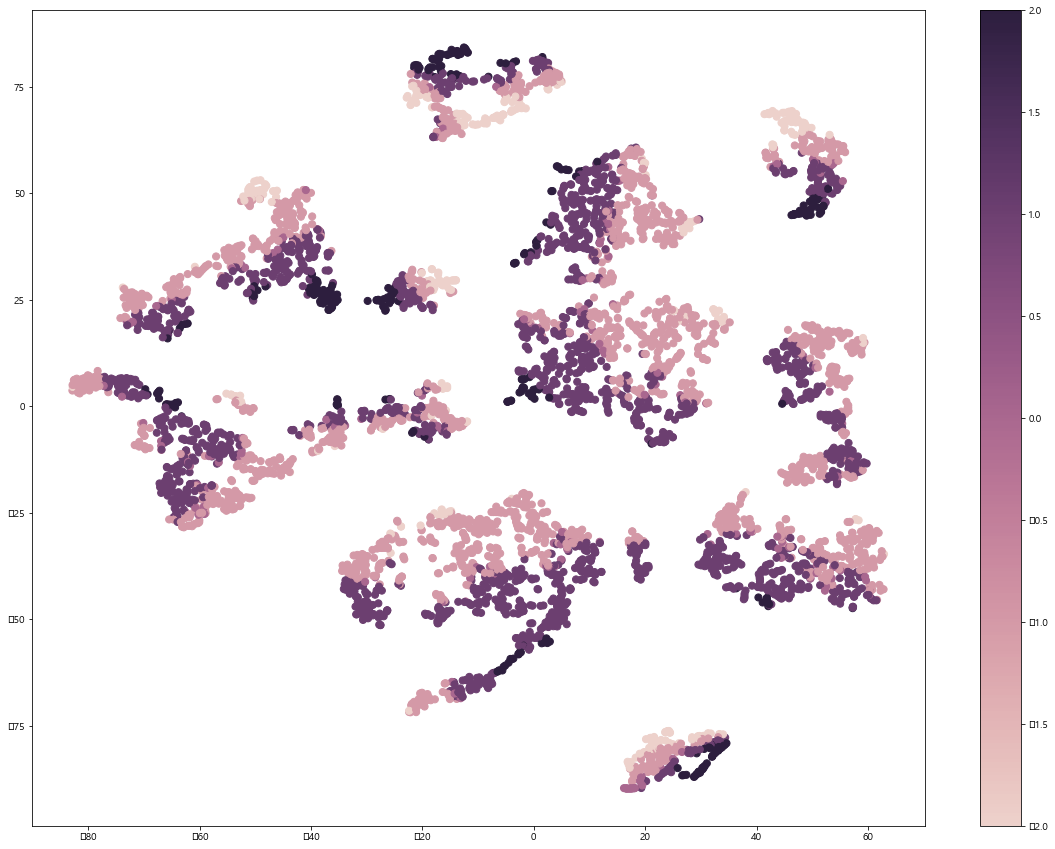

In [70]:
f, ax = plt.subplots(figsize=(20,15))
points = ax.scatter(tsne_result[:,0], tsne_result[:,1], c=Sdata['등락 분류'], s=50, cmap=cmap)
f.colorbar(points)
plt.show()

## 종속변수 분포 확인

<AxesSubplot:title={'center':'등락 분류'}>

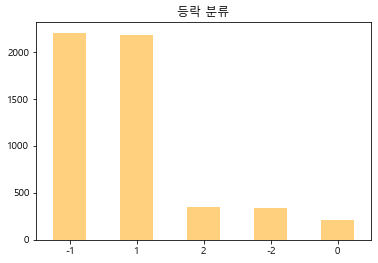

In [80]:
ax = Sdata['등락 분류'].value_counts()
ax.plot(kind='bar',  title="등락 분류", color='orange', alpha=0.5, rot=1)

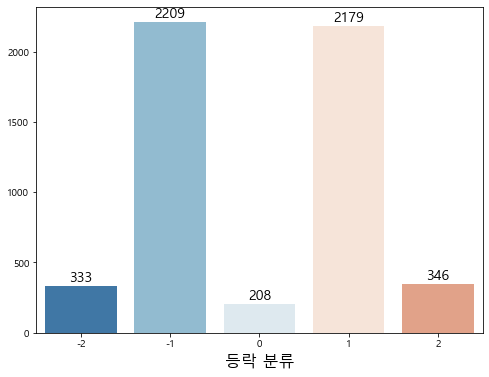

In [131]:
plt.figure(figsize=(8, 6))
palette=sns.color_palette("RdBu_r")
plots = sns.countplot(x="등락 분류", data=Sdata, palette = palette)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                   ha='center', va='center',size=14, xytext=(0, 8),textcoords='offset points')


plt.xlabel("등락 분류", size=16)
plt.ylabel("", size=0)
plt.show()

## 2020년 3월 23일 포스트 코로나 종속변수 분포 확인

In [14]:
df = Sdata.loc["2020-03-23":]
df.head()

,등락지표,등락 분류,종가,대비,등락률,시가,고가,저가,거래량,거래대금,...,상장주식수,환율,유가종가,유가오픈,유가고가,유가저가,유가변동률,한국은행기준금리,연준기준금리,한미기준금리차이
날짜,,,,,,,,,,,,,,,,,,,,,
2020-03-23,-1,-2,69400,-5400,-7.22,69700,71600,68000,8192363,5.710000e+11,...,728002365,1254.1,23.36,22.52,24.07,20.80,4.15,1.25,0.25,-1.0
2020-03-24,1,2,78700,9300,13.40,73000,78800,72100,7247345,5.490000e+11,...,728002365,1274.6,24.01,23.87,25.16,23.09,2.78,1.25,0.25,-1.0
2020-03-25,1,2,84500,5800,7.37,82000,84700,79800,8787217,7.240000e+11,...,728002365,1256.0,24.49,24.37,25.24,22.91,2.00,1.25,0.25,-1.0
2020-03-26,-1,-1,80700,-3800,-4.50,85000,87900,80400,7895289,6.660000e+11,...,728002365,1230.7,22.60,24.25,24.65,22.38,-7.72,1.25,0.25,-1.0
2020-03-27,1,1,83300,2600,3.22,85700,85700,80500,8085695,6.730000e+11,...,728002365,1227.9,21.51,23.29,23.44,20.88,-4.82,1.25,0.25,-1.0


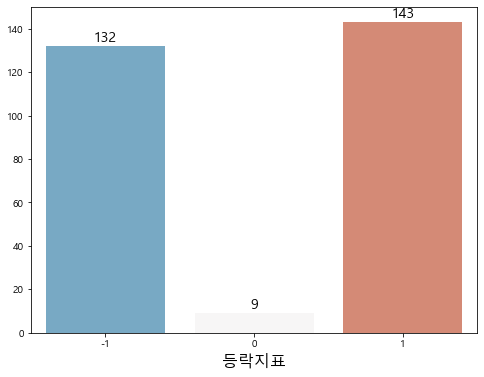

In [21]:
plt.figure(figsize=(8, 6))
palette=sns.color_palette("RdBu_r",3)
plots = sns.countplot(x="등락지표", data=df, palette = palette)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                   ha='center', va='center',size=14, xytext=(0, 8),textcoords='offset points')

plt.xlabel("등락지표", size=16)
plt.ylabel("", size=0)
plt.rcParams['font.family'] = 'NanumGothic'
plt.show()

c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46973 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s

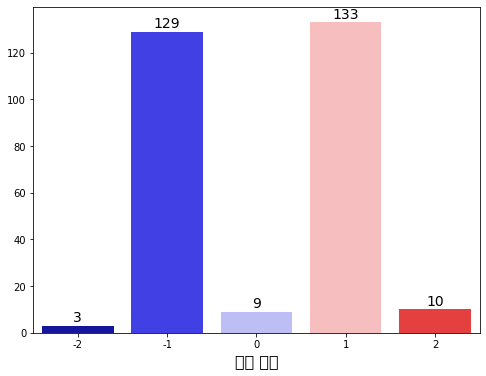

In [27]:
plt.figure(figsize=(8, 6))
palette=sns.color_palette("seismic")
plots = sns.countplot(x="등락 분류", data=df, palette = palette)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                   ha='center', va='center',size=14, xytext=(0, 8),textcoords='offset points')


plt.xlabel("등락 분류", size=16)
plt.ylabel("", size=0)
plt.rcParams['font.family'] = 'NanumGothic'
plt.show()